# **IMPLEMENTACIÓN BÁSICA DE PCA**

In [1]:
import pandas as pd
df=pd.read_csv("nndb_flat.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


Limpiamos los datos: se  consideran únicamente las columnas con valores numéricos flotantes

In [3]:
#Eliminamos en las columnas con valores no numéricos (serán los únicos que consideramenos en la reducción de dimensionalidad)
columna=0
while columna < len(df.columns):
    if df.dtypes[0] != "float64":
        df.drop(columns=df.columns[0], inplace=True, axis=1)
        columna +=1
    else:
        columna += 1  
df

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


Estandarizamos nuestros datos y vizualisamos estos

In [4]:
from sklearn.preprocessing import StandardScaler
data_matrix=StandardScaler().fit_transform(df)
data=pd.DataFrame(data_matrix, columns=df.columns)

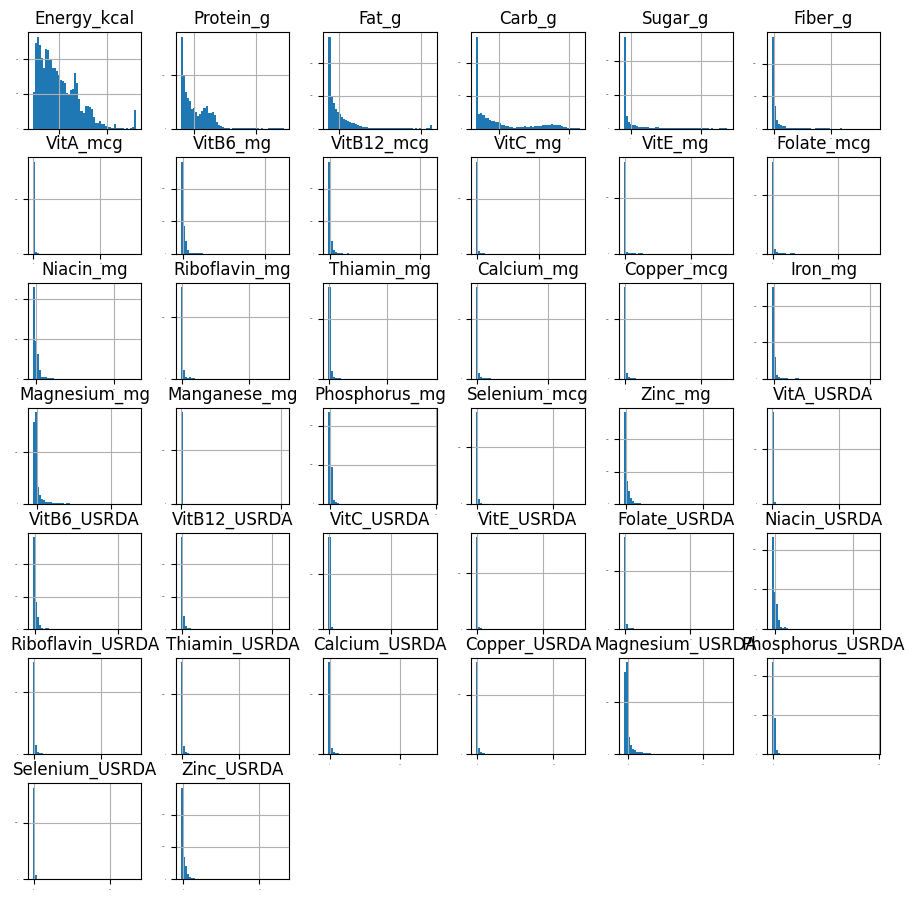

In [5]:
import matplotlib.pyplot as plt
ax = data.hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(11,11))

Vemos que la mayoria de nuestros datos son asimétricos hacia la derecha (skweed-right), aún  así realizaremos una reducción de dimensionalidad mediante PCA

In [6]:
import numpy as np; datos=np.array(data)
from sklearn.decomposition import PCA; pca=PCA()
pca.fit(data); pca.fit_transform(data);

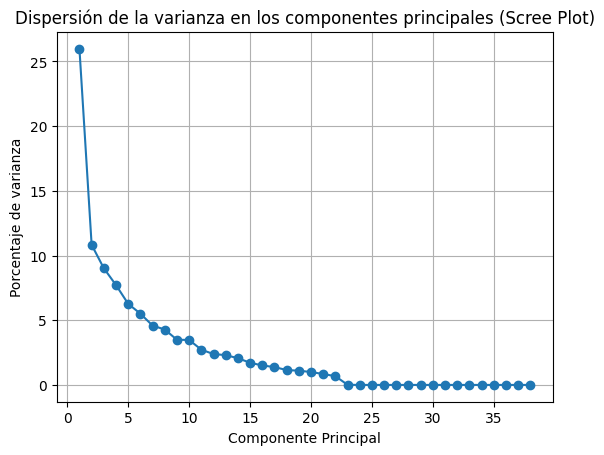

In [7]:
#Visualizamos la viabilidad de realizar una reducción de dimensionalidad mediante PCA analizando la varianza explicada
import matplotlib.pyplot as plt
plt.plot(np.arange(1, pca.n_components_+1), pca.explained_variance_ratio_*100, 'o-')
plt.title("Dispersión de la varianza en los componentes principales (Scree Plot)")
plt.ylabel("Porcentaje de varianza")
plt.xlabel("Componente Principal")
plt.grid()

Nos quedaremos con los componentes principales tales que la varianza acomulada sea aproximadamente del 70%

In [8]:
for n in range(1,9):
    por_var= pca.explained_variance_ratio_[:n].sum()*100
    print (f'El porcentaje de varianza al considerar   {n} component(es) principal(es) es {por_var} \n')

El porcentaje de varianza al considerar   1 component(es) principal(es) es 25.970166250885274 

El porcentaje de varianza al considerar   2 component(es) principal(es) es 36.79837073466239 

El porcentaje de varianza al considerar   3 component(es) principal(es) es 45.817381421889316 

El porcentaje de varianza al considerar   4 component(es) principal(es) es 53.534247656582615 

El porcentaje de varianza al considerar   5 component(es) principal(es) es 59.800946460904406 

El porcentaje de varianza al considerar   6 component(es) principal(es) es 65.30980215525011 

El porcentaje de varianza al considerar   7 component(es) principal(es) es 69.89551683148395 

El porcentaje de varianza al considerar   8 component(es) principal(es) es 74.17903495195907 



Con base a la implementación anterior, vemos que resulta poco viable implementar PCA para la vizualicación de nuestros datos. 


***Pero no hemos tomado en cuenta posibles correlaciones entre nuestros datos***... (vovlamos a implementar el análisis desde cero)

# ***IMPLEMENTACIÓN DE PCA CONSIDERANDO POSIBLES CORRELACIONES ENTRE VARIABLES***

In [9]:
import pandas as pd
import numpy as np
dfc=pd.read_csv("nndb_flat.csv")

In [10]:
dfc.dtypes.info()

<class 'pandas.core.series.Series'>
Index: 45 entries, ID to Zinc_USRDA
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
45 non-null     object
dtypes: object(1)
memory usage: 720.0+ bytes


In [11]:
columna = 0
while columna < len(dfc.columns):
    if dfc.dtypes[0] != "float64":
        dfc.drop(columns=dfc.columns[0], inplace = True, axis=1)
    columna +=  1

In [12]:
dfc

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


Realizamos un análisis de la correlación (de pearson) entre las varibales... no utilizamos la covarianza puesto que ésta depende de la escala de las variables impñlicadas

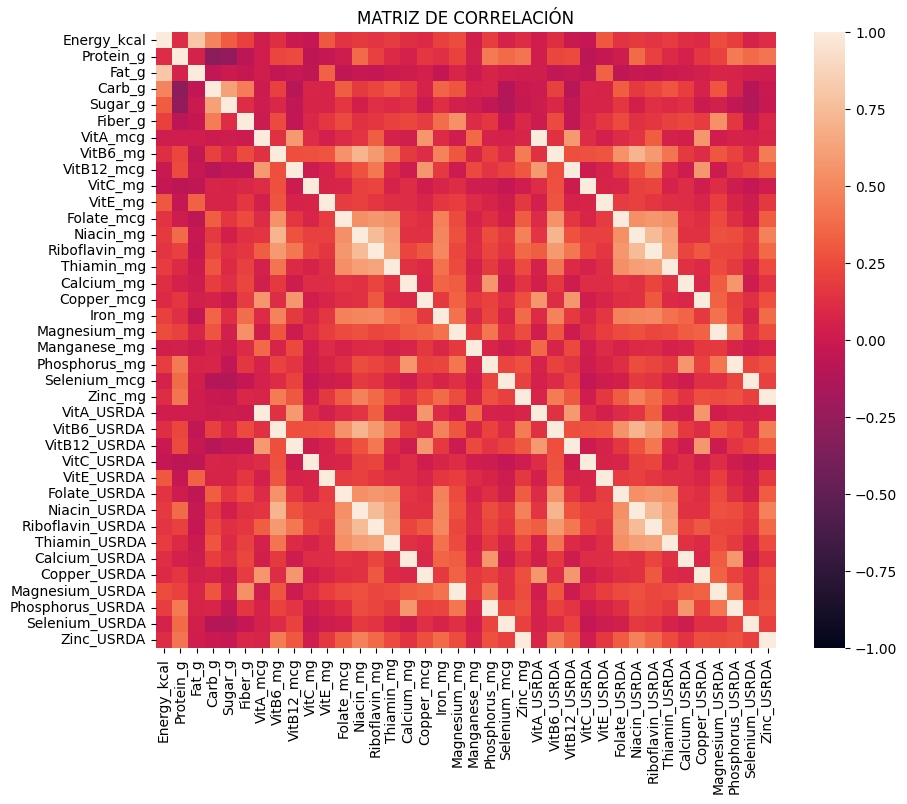

In [13]:
import seaborn as sns


matriz_correlacion=dfc.corr()
plt.figure(figsize=(10,8))
plt.title("MATRIZ DE CORRELACIÓN")
sns.heatmap(data=matriz_correlacion, cmap="rocket", vmin=-1, vmax=1)
plt.show()

In [14]:
for columna in dfc.columns:
    if "USRDA" in columna:
        dfc.drop(columns=columna, inplace=True)   

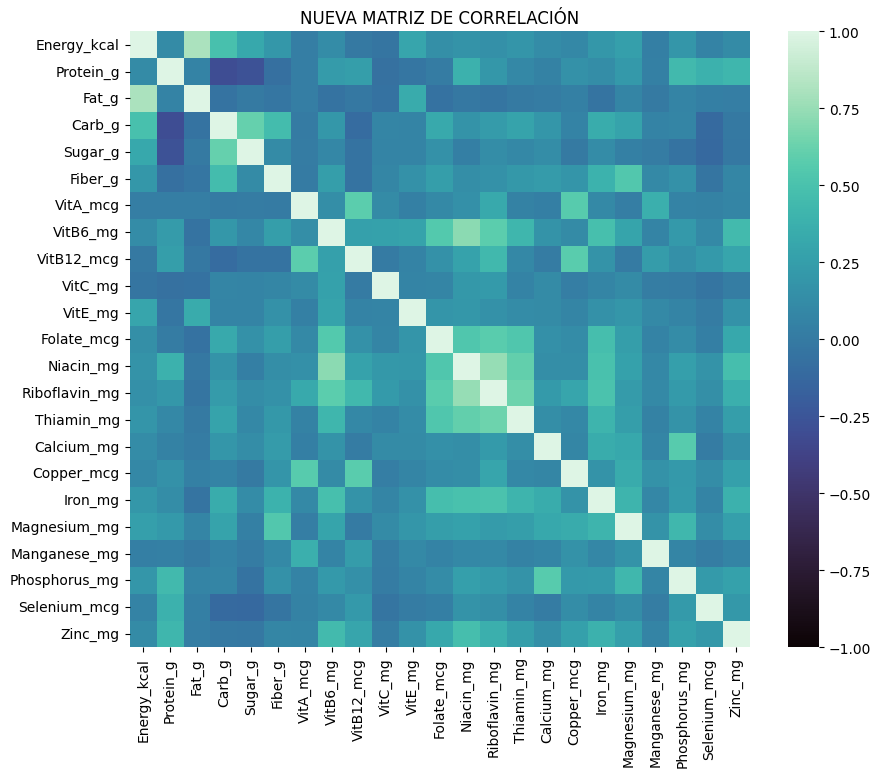

In [15]:
#Volvemos a analizar la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt


matriz_correlación = dfc.corr()
plt.figure(figsize=(10,8))
plt.title("NUEVA MATRIZ DE CORRELACIÓN")
sns.heatmap(data=matriz_correlación, cmap='mako', vmin=-1, vmax=1)
plt.show()

Una vez logrado esto, implementamos el análisis de viabilidad de PCA

In [16]:
from sklearn.decomposition import PCA; pca=PCA()
matriz_datos = np.array(dfc)
pca.fit(matriz_datos); pca.fit_transform(matriz_datos);

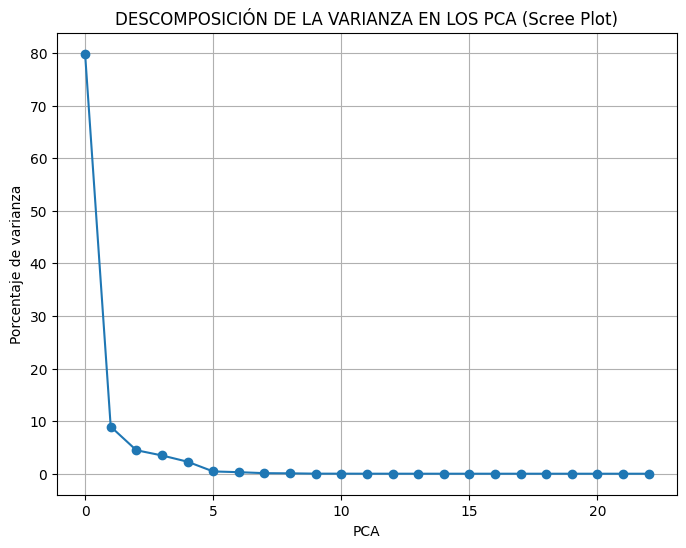

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
plt.plot(pca.explained_variance_ratio_*100, 'o-')
plt.title("DESCOMPOSICIÓN DE LA VARIANZA EN LOS PCA (Scree Plot)")
plt.ylabel("Porcentaje de varianza")
plt.xlabel("PCA")
plt.grid()

In [20]:
pca=PCA(n_components=1)
pca.fit(matriz_datos); dataPCA2=pca.fit_transform(matriz_datos);

TypeError: scatter() missing 1 required positional argument: 'y'